#  Engineering internship at LAMSIN_ENIT

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the task

The goal of this internship is to analyze *weather patterns* and predict *future behavior* using **machine learning (ML)** and **deep learning (DL)** algorithms. The objective is to demonstrate that these algorithms can effectively enhance the understanding and forecasting of weather phenomena with a high degree of **accuracy.**

The target variable can be:
- Tempreture (°C)
- Precipition (mm)
- humidity (%)
- wind speed (km/h)

These variables are continuous variables,which makes our problem a **regression problem.**

# Part 1 : Weather Data Analysis

## 1.1 Data Exploration

In [3]:
BD=pd.read_csv("C:\\Users\\Youba\\Downloads\\weather_data.csv\\weather_data.csv")

Let's explore the features available in our dataset.

In [4]:
BD.columns

Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')

Our dataset contains six attributes: 
- **Location :** the city where the data was collected.
- **Date_time :** the date and time of collection.
- **Temperature**, **Precipitation**, **Humidity**, and **Wind Speed :** which are the recorded variables.

In [5]:
BD.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [6]:
BD.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


We can observe that the maximum temperature is 39.999801°C (rounded to 40°C), which is relatively high. The minimum temperature is -19.969311°C, indicating a significantly low value. However, considering the first quartile (2.269631°C) and the median (14.778002°C), we can conclude that this is not a particularly hot location.

In [7]:
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [8]:
BD['Date_Time'] = pd.to_datetime(BD['Date_Time'], utc=True)

In [9]:
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype              
---  ------            --------------    -----              
 0   Location          1000000 non-null  object             
 1   Date_Time         1000000 non-null  datetime64[ns, UTC]
 2   Temperature_C     1000000 non-null  float64            
 3   Humidity_pct      1000000 non-null  float64            
 4   Precipitation_mm  1000000 non-null  float64            
 5   Wind_Speed_kmh    1000000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(1)
memory usage: 45.8+ MB


In [10]:
BD1 = BD.copy()
BD1['Year'] = BD1['Date_Time'].dt.year
BD1['Month'] = BD1['Date_Time'].dt.month
BD1['Day'] = BD1['Date_Time'].dt.day
BD1['Hour'] = BD1['Date_Time'].dt.hour
BD1['Minute'] = BD1['Date_Time'].dt.minute
BD1['Second'] = BD1['Date_Time'].dt.second
BD1.drop(columns=['Date_Time'], inplace=True)
nw_columns=['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
column_order = nw_columns + [col for col in BD1.columns if col not in nw_columns]
BD1 = BD1[column_order]
BD1.head()

,Year,Month,Day,Hour,Minute,Second,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,2024,1,14,21,12,46,San Diego,10.683001,41.195754,4.020119,8.233540
1,2024,5,17,15,22,10,San Diego,8.734140,58.319107,9.111623,27.715161
2,2024,5,11,9,30,59,San Diego,11.632436,38.820175,4.607511,28.732951
3,2024,2,26,17,32,39,Philadelphia,-8.628976,54.074474,3.183720,26.367303
4,2024,4,29,13,23,51,San Antonio,39.808213,72.899908,9.598282,29.898622


Let's explore the time period (months) during which this data was recorded.

In [11]:
BD1['Month'].value_counts()

1    223290
3    223072
4    216804
2    208478
5    128356
Name: Month, dtype: int64

The recorded data spans from the month of January to the month of May.

Now, let's move on to the locations (cities).

In [12]:
BD1['Location'].value_counts()

Phoenix         100209
Chicago         100164
Philadelphia    100122
Houston         100076
New York         99972
San Antonio      99962
Dallas           99936
Los Angeles      99922
San Jose         99863
San Diego        99774
Name: Location, dtype: int64

## 1.2 Plot the distribution of each variable

array([[<Axes: title={'center': 'Temperature_C'}>,
        <Axes: title={'center': 'Humidity_pct'}>],
       [<Axes: title={'center': 'Precipitation_mm'}>,
        <Axes: title={'center': 'Wind_Speed_kmh'}>]], dtype=object)

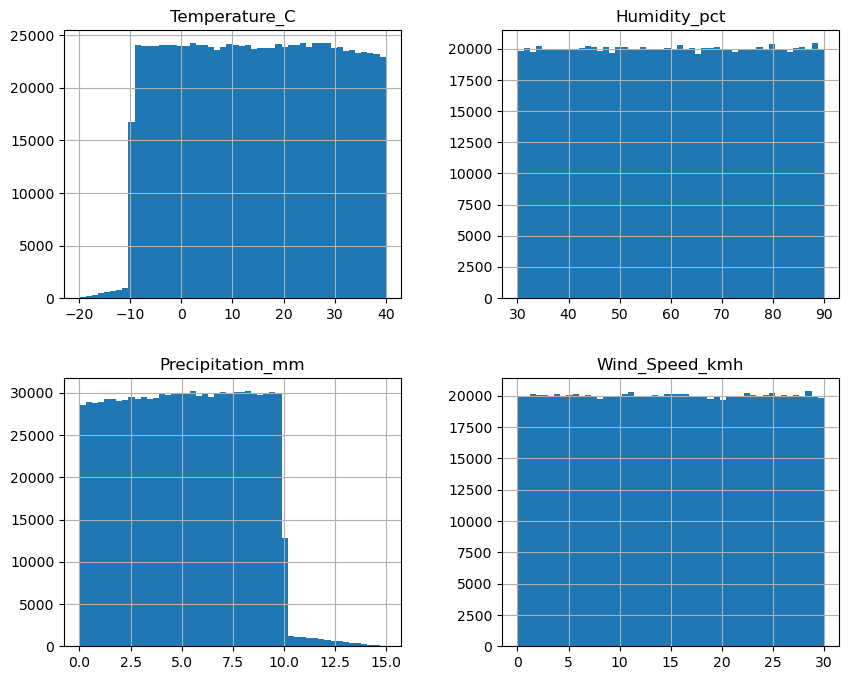

In [13]:
%matplotlib inline 
colonnes_a_exclure = ['Year', 'Month','Day','Hour','Minute','Second']
colonnes_a_inclure = [col for col in BD1.columns if col not in colonnes_a_exclure]
BD1[colonnes_a_inclure].hist(bins=50, figsize=(10, 8))

## 1.3 Exploration by region

We will now proceed to a regional analysis. To do this, we will create a function called *region_analyze* to separate the regions.

In [17]:
def region_analyser(BD,region):
    data=BD[BD['Location']==region]
    data=data.sort_values('Date_Time')
    data=data.reset_index()
    data=data.drop('index',axis=1)
    data=data.drop('Location',axis=1)
    data=data.set_index('Date_Time')
    return data

In [18]:
 region_analyser(BD,'Philadelphia').head()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Date_Time,,,,
2024-01-01 00:02:01+00:00,14.053927,36.819607,7.674568,26.373158
2024-01-01 00:04:08+00:00,20.338468,83.716826,0.433529,6.721690
2024-01-01 00:04:17+00:00,33.151358,43.907956,2.468438,2.805796
2024-01-01 00:07:11+00:00,27.492741,62.202252,7.471210,14.933386
2024-01-01 00:07:27+00:00,5.981641,53.821122,6.865934,20.463696


In [19]:
from scipy.stats import kstest
ks_statistic, p_value = kstest( region_analyser(BD,'New York')['Temperature_C'], 'norm')
print(f"{'Temperature_C'} - KS Statistic: {ks_statistic:.4f}, P-value: {p_value:.4f}")

Temperature_C - KS Statistic: 0.7451, P-value: 0.0000


In [20]:
def feature_analyzer(region,feature,rows):
    data=region_analyser(BD,region)
    
    plt.figure(figsize=(15, 6))
    plt.subplot(2,1,1)
    data[feature].head(rows).plot()
    plt.axhline(data[feature].mean(),color='k',linestyle='--',linewidth=2.5,label='mean')
    plt.axhline(data[feature].median(),color='g',linestyle='--',linewidth=2.5,label='median')
    plt.axhline(data[feature].mode()[0],color='m',linestyle='--',linewidth=3,label='mode')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.figure(figsize=(10, 6))
    plt.subplot(2,1,2)
    sns.kdeplot(data[feature].head(rows))
    plt.axvline(data[feature].mean(),color='k',linestyle='--',linewidth=2.5,label='mean')
    plt.axvline(data[feature].median(),color='g',linestyle='--',linewidth=2.5,label='median')
    plt.axvline(data[feature].mode()[0],color='m',linestyle='--',linewidth=3,label='mode')
    plt.legend(loc='best')
    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()

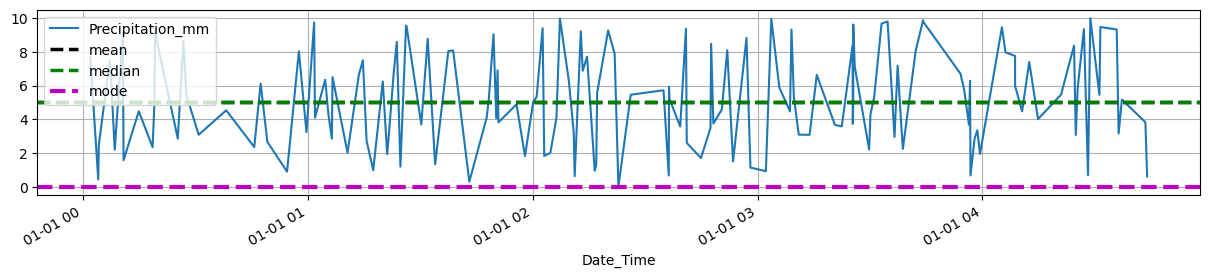

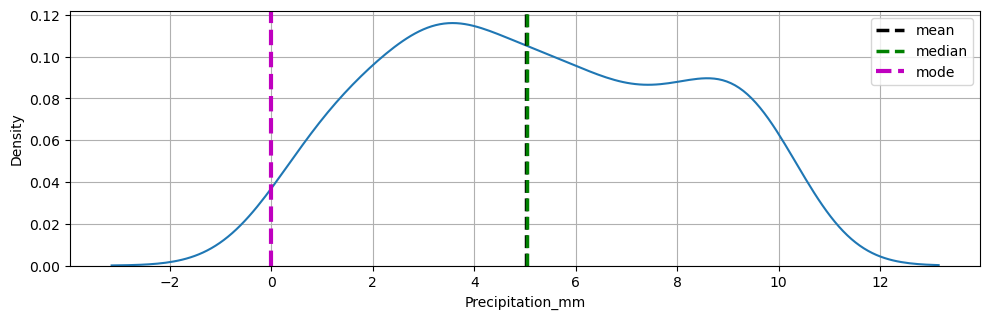

In [21]:
feature_analyzer('Philadelphia','Precipitation_mm',150)

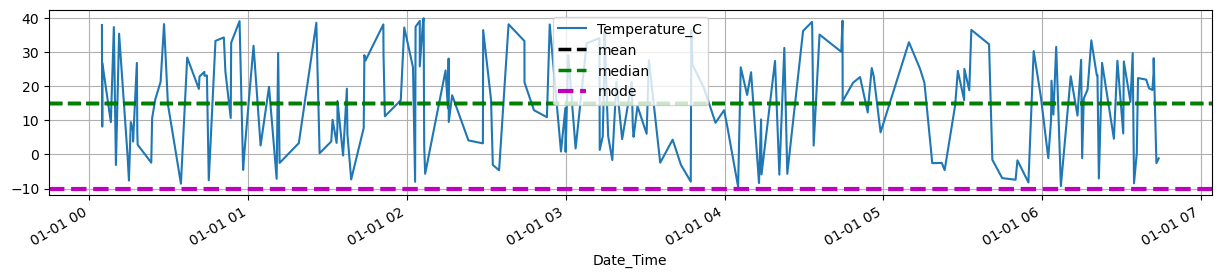

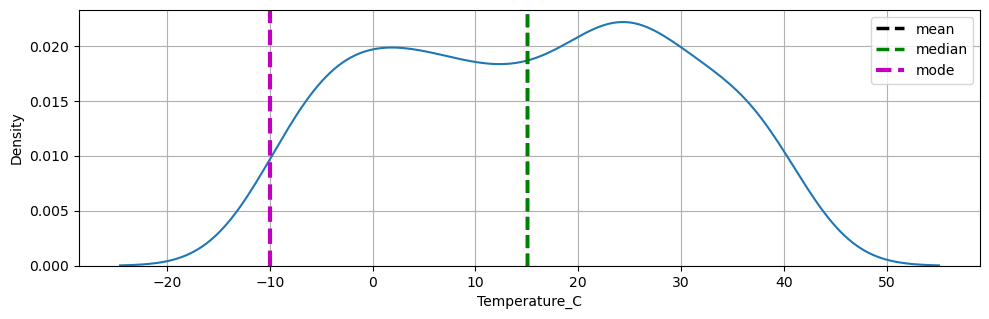

In [22]:
feature_analyzer('New York','Temperature_C',200)

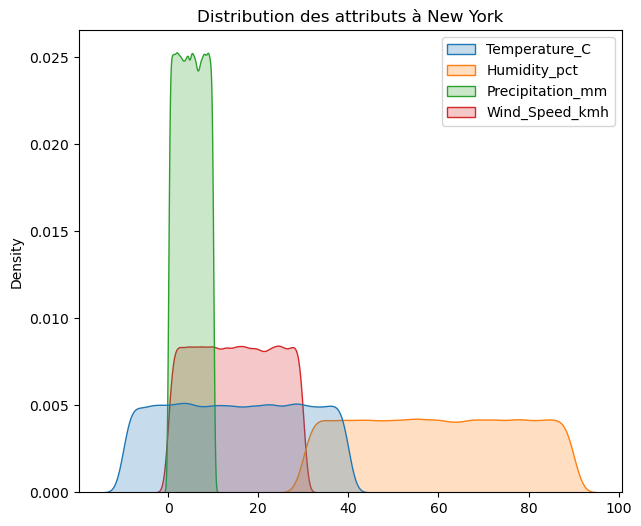

In [23]:
plt.figure(figsize=(7, 6))
sns.kdeplot(data=BD[BD['Location'] == 'New York'], fill=True)
plt.title('Distribution des attributs à New York')
plt.show()

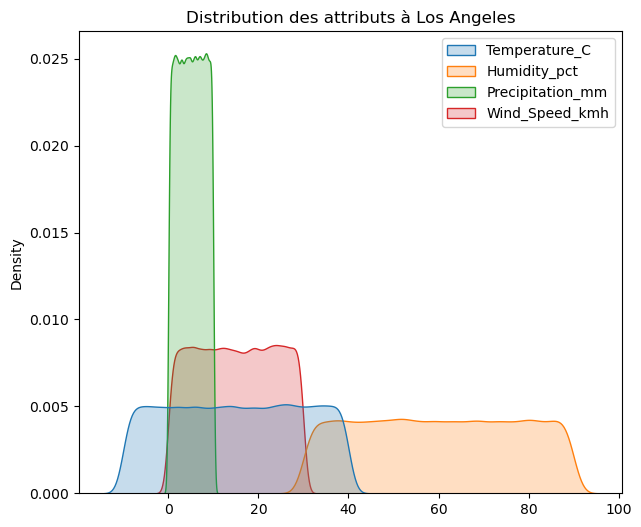

In [24]:
plt.figure(figsize=(7, 6))
sns.kdeplot(data=BD[BD['Location'] == 'Los Angeles'], fill=True)
plt.title('Distribution des attributs à Los Angeles')
plt.show()

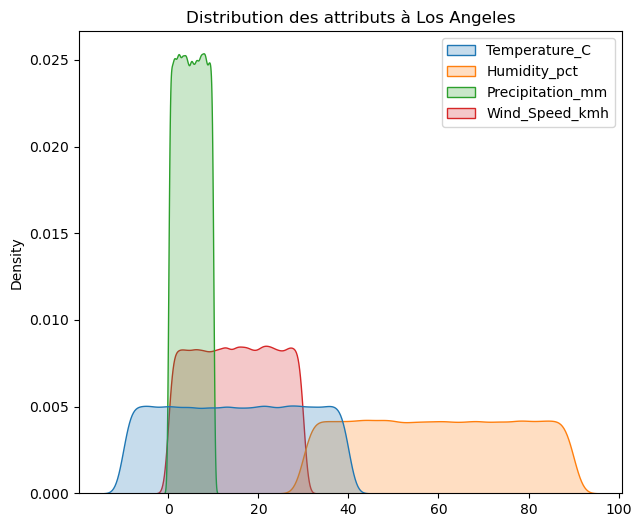

In [25]:
plt.figure(figsize=(7, 6))
sns.kdeplot(data=BD[BD['Location'] == 'Dallas'], fill=True)
plt.title('Distribution des attributs à Los Angeles')
plt.show()

## 1.4 Correlation Analysis

In [26]:
df_subset = BD[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']]

In [27]:
correlation_matrix = df_subset.corr()

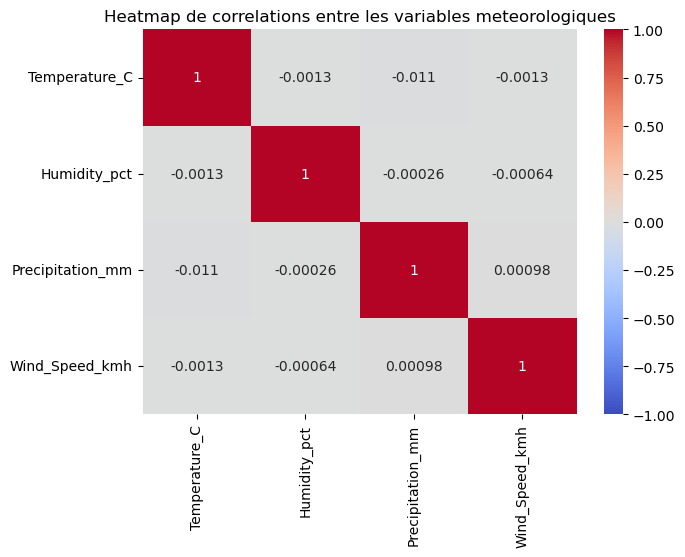

In [28]:
plt.figure(figsize=(7, 5))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de correlations entre les variables meteorologiques')
plt.show()

In [29]:
def data_separator(feature,region,rows):
    # Créer une copie du DataFrame
    data = BD.copy()
    data=region_analyser(data,region)
    data=data.head(rows)
    # Déterminer les colonnes à conserver
    columns_to_keep = [feature]
    
    # Supprimer les colonnes qui ne sont pas dans columns_to_keep
    columns_to_drop = [col for col in data.columns if col not in columns_to_keep]
    
    # Supprimer les colonnes indésirables
    data = data.drop(columns=columns_to_drop)
    
    # Définir 'Date_Time' comme index
    #data = data.set_index('Date_Time')
    
    #Triage dans l'ordre croissant de Date_Time
    #data=data.sort_values('Date_Time')
    
    #siprimer la variable Date_Time
    #data=data.drop('Date_Time',axis=1)
    return data

In [1123]:
df_tempreture=data_separator('Temperature_C','New York',99972)

In [903]:
df_tempreture.head()

,Wind_Speed_kmh
Date_Time,
2024-01-01 00:04:45+00:00,24.157506
2024-01-01 00:04:52+00:00,0.612134
2024-01-01 00:04:55+00:00,8.243974
2024-01-01 00:08:07+00:00,14.291018
2024-01-01 00:09:15+00:00,1.220043


In [1124]:
# Resampler les données à 15 minutes, ici on prend la moyenne pour chaque intervalle
df_resampled = df_tempreture.resample('1440T').mean()  # '15T' signifie 15 minutes

# Optionnel : Interpolation pour combler les valeurs manquantes
#df_resampled = df_resampled.interpolate()
df_resampled.head()

,Temperature_C
Date_Time,
2024-01-01 00:00:00+00:00,15.213386
2024-01-02 00:00:00+00:00,14.404826
2024-01-03 00:00:00+00:00,15.619724
2024-01-04 00:00:00+00:00,14.064606
2024-01-05 00:00:00+00:00,15.542206


In [233]:
#df_tempreture['Time_Step'] = (df_tempreture.index - df_tempreture.index.min()) / pd.Timedelta(minutes=1)
#print(df_tempreture)

In [234]:
#df_tempreture['Lag_1'] = df_tempreture['Temperature_C'].shift(2)
#df_tempreture = df_tempreture.reindex(columns=['Temperature_C', 'Lag_1'])
#df_tempreture.head()

In [235]:
#df_tempreture = df_tempreture.dropna()

In [1125]:
df_resampled ['time_step'] = range(len(df_resampled ))
df_resampled.head()

,Temperature_C,time_step
Date_Time,,
2024-01-01 00:00:00+00:00,15.213386,0
2024-01-02 00:00:00+00:00,14.404826,1
2024-01-03 00:00:00+00:00,15.619724,2
2024-01-04 00:00:00+00:00,14.064606,3
2024-01-05 00:00:00+00:00,15.542206,4


In [262]:
df_resampled.columns

Index(['Temperature_C', 'time_step'], dtype='object')

In [1126]:
# Séparation des features et de la target
X = df_resampled['time_step']
y = df_resampled['Temperature_C']
X = df_resampled['time_step'].dropna()  # Supprimer les valeurs manquantes
Y = df_resampled['Temperature_C'].dropna()

In [588]:
from sklearn.model_selection import train_test_split

In [1127]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

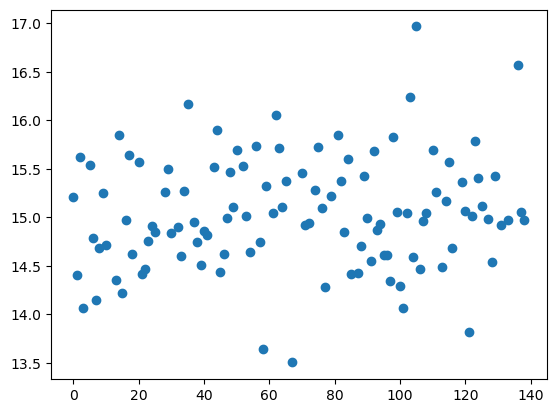

In [1128]:
plt.scatter(x_train,y_train)

# Part 2 : Model Development

We will develop five models: **Linear Regression**, **Random Forest Regressor**, **XGBoost**, **Artificial Neural Network**, and **Recurrent Neural Network.**

In [1129]:
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [856]:
df_tempreture.columns

Index(['Temperature_C'], dtype='object')

## 2.1 LinearRgression


In [633]:
from sklearn.linear_model import LinearRegression

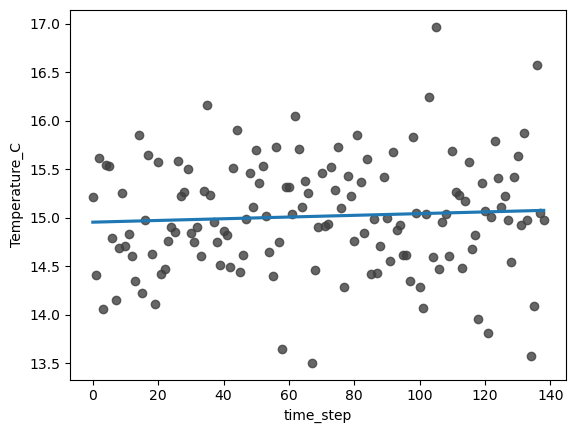

In [1130]:
fig, ax = plt.subplots()
ax = sns.regplot(x='time_step', y='Temperature_C', data=df_resampled, ci=None, scatter_kws=dict(color='0.25'))

In [740]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Mean Squared Error (MSE): 0.3414048099589692
RMSE: 0.5842985623454581
Mean Absolute Error (MAE): 0.47210107477012414
R² Score: -0.09452769550095419


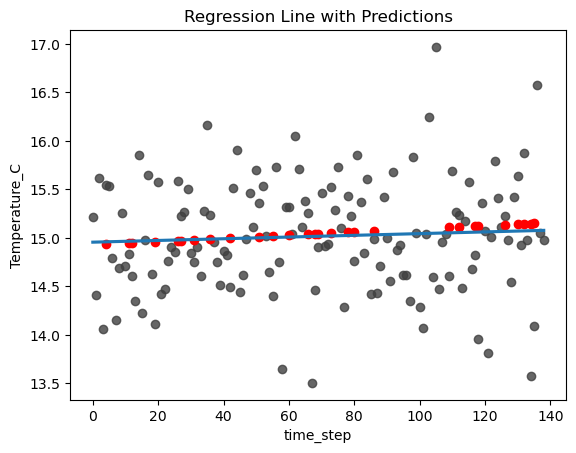

In [1131]:
# Création du modèle
model = LinearRegression()
model.fit(x_train, y_train)

# Prédictions
y_pred = model.predict(x_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f'Mean Squared Error (MSE): {mse}')
print(f"RMSE: {rmse}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

# Visualisation des résultats
fig, ax = plt.subplots()
ax = sns.regplot(x='time_step', y='Temperature_C', data=df_resampled, ci=None, scatter_kws=dict(color='0.25'))
plt.scatter(x_test, y_pred, color='red')  # Ajout des prédictions
plt.xlabel('time_step')
plt.ylabel('Temperature_C')
plt.title('Regression Line with Predictions')
plt.show()

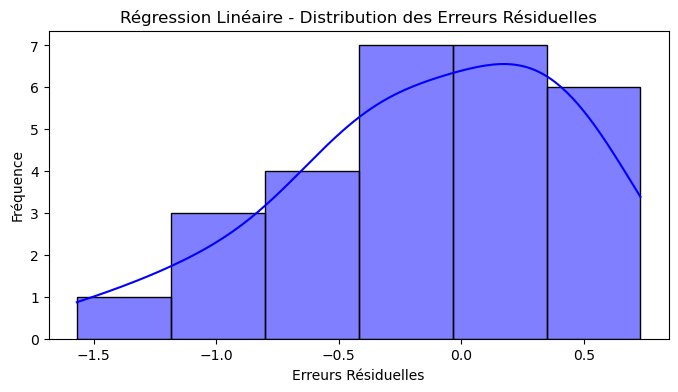

In [1132]:
residuals_lr = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuals_lr, kde=True, color='blue')
plt.title('Régression Linéaire - Distribution des Erreurs Résiduelles')
plt.xlabel('Erreurs Résiduelles')
plt.ylabel('Fréquence')
plt.show()

## 2.2 RandomForestRegressor

In [1133]:
from sklearn.ensemble import RandomForestRegressor

In [1134]:
model = RandomForestRegressor(n_estimators=500, random_state=42)  # Vous pouvez ajuster n_estimators
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

Mean Squared Error (MSE): 0.524460664948251
RMSE: 0.7241965651314918
Mean Absolute Error (MAE): 0.5353171565194094
R² Score: -0.6813961205048524


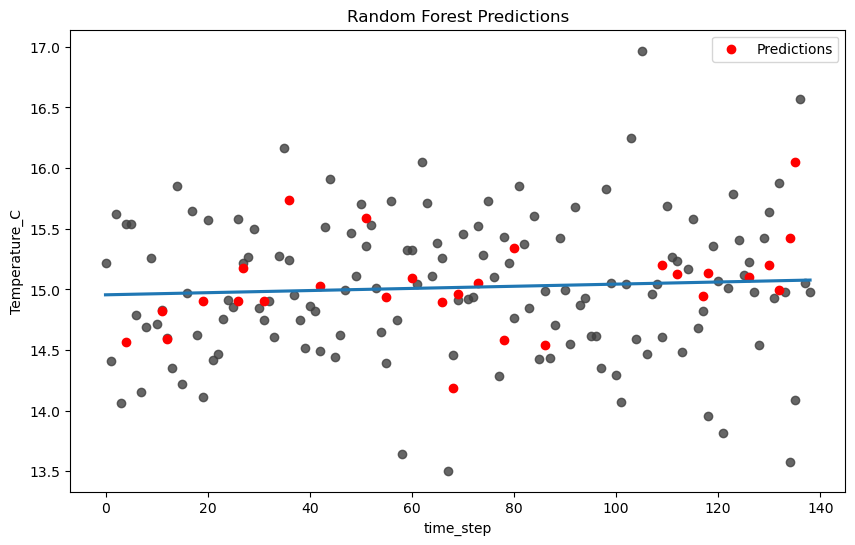

In [1135]:
# Prédictions
y_pred = model.predict(x_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f'Mean Squared Error (MSE): {mse}')
print(f"RMSE: {rmse}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

# Visualisation des résultats
plt.figure(figsize=(10, 6))
sns.regplot(x='time_step', y='Temperature_C', data=df_resampled, ci=None, scatter_kws=dict(color='0.25'))
plt.scatter(x_test, y_pred, color='red', label='Predictions')
plt.xlabel('time_step')
plt.ylabel('Temperature_C')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

## 2.3 XGBoost

In [48]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [1137]:
import xgboost as xgb

In [1138]:
# Création des matrices DMatrix pour l'entraînement et les tests
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Paramètres du modèle XGBoost
params = {
    'objective': 'reg:squarederror', # Utilisation de l'erreur quadratique moyenne pour la régression
    'max_depth': 3,                  # Profondeur maximale de l'arbre
    'eta': 0.1,                      # Taux d'apprentissage
    'subsample': 0.8,                # Sous-échantillonnage des données d'entraînement
    'colsample_bytree': 0.8          # Sous-échantillonnage des colonnes
}

# Entraînement du modèle
model = xgb.train(params, dtrain, num_boost_round=100)

# Prédictions sur le jeu de test
y_pred = model.predict(dtest)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.3697499689629767
RMSE: 0.6080706940504341
Mean Absolute Error (MAE): 0.47097662332841594
R² Score: -0.1854009364696243


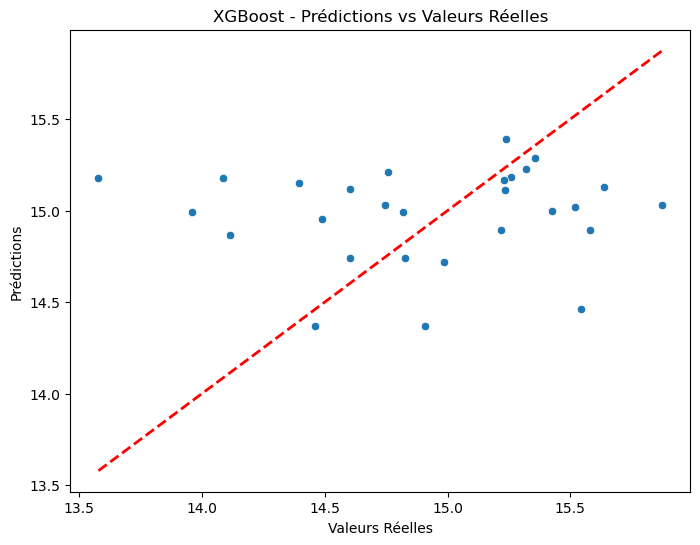

In [1139]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('XGBoost - Prédictions vs Valeurs Réelles')
plt.show()


In [51]:
pip install tensorflow keras

## 3.3 Artificial Neural Network

In [52]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Youba\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Mean Squared Error (MSE): 0.3759838594889861
RMSE: 0.6131752273934312
Mean Absolute Error (MAE): 0.46595074463703995
R² Score: -0.20538649505697504


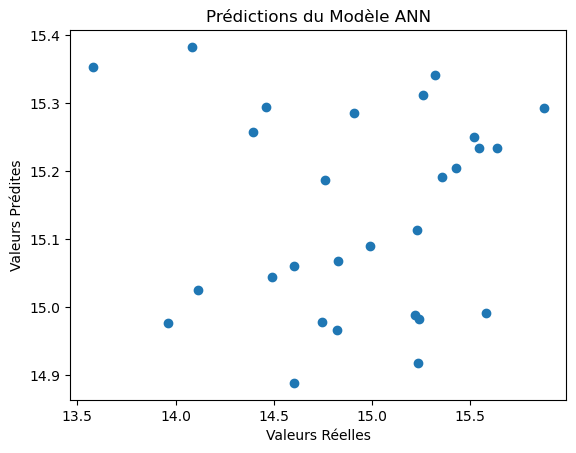

In [1141]:
# Normalisation des données
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Construction du modèle ANN
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # Couche d'entrée avec 64 neurones
model.add(Dense(32, activation='relu'))                # Couche cachée
model.add(Dense(1))                                    # Couche de sortie

# Compilation du modèle
model.compile(loss='mean_squared_error', optimizer='adam')

# Entraînement du modèle
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)

# Prédictions
y_pred = model.predict(x_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f'Mean Squared Error (MSE): {mse}')
print(f"RMSE: {rmse}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

# Visualisation des résultats
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Prédictions du Modèle ANN')
#plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Ligne de référence
plt.show()

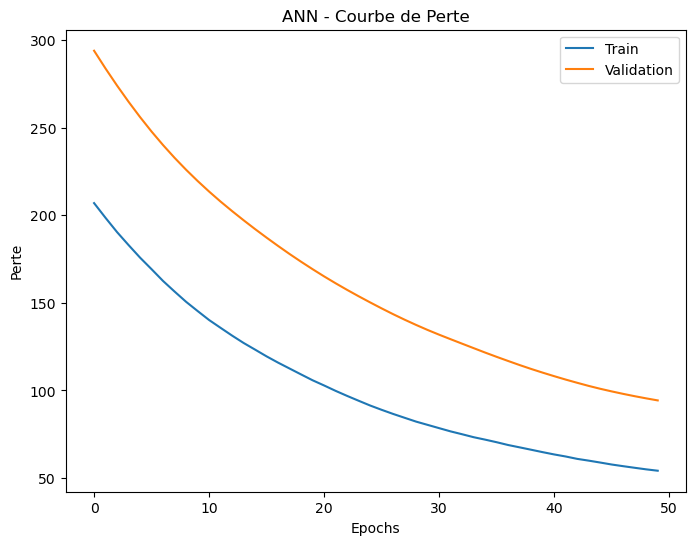

In [1142]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('ANN - Courbe de Perte')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.legend()
plt.show()


## 2.5 Recurrent Neural Network

In [346]:
from keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [1143]:
data_column = 'Temperature_C'  # Remplacez cela par le nom de votre colonne de données
data = df_resampled[data_column].values  # Extraire la colonne des données


In [1144]:
def create_sequences(data, time_step=15):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])  # Séquence des features
        y.append(data[i + time_step])    # Valeur suivante (étiquette)
    return np.array(X), np.array(y)

In [1145]:
# Paramètres
time_step = 15

# Créer les séquences à partir des données
X, y = create_sequences(data, time_step)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape des données pour correspondre au format [samples, time_steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Initialiser le scaler pour normaliser les données
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Ajuster le scaler sur les données d'entraînement et transformer les données d'entraînement
X_train_scaled = np.reshape(scaler_X.fit_transform(X_train.reshape(-1, 1)), X_train.shape)
X_test_scaled = np.reshape(scaler_X.transform(X_test.reshape(-1, 1)), X_test.shape)

# Ajuster et transformer les étiquettes y
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Construction du modèle RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(time_step, 1)),
    tf.keras.layers.SimpleRNN(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=32)

# Prédictions sur les données de test
predictions_scaled = model.predict(X_test_scaled)

# Inverser la normalisation des prédictions et des valeurs de test
predictions_original = scaler_y.inverse_transform(predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test_original, predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)

# Afficher les métriques
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

# Afficher un échantillon des prédictions et des valeurs réelles
print("Prédictions : ", predictions_original[:5].flatten())
print("Valeurs réelles : ", y_test_original[:5].flatten())

C:\Users\Youba\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 1.2136
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0573
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8752
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9707
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9479
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7655
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7562
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8043
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7554 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8826 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step
MSE: 0.45705510263633614
RMSE: 0.6760585053354008
MAE: 0.5684783893862153
R^2: 0.0471916250365062
Prédictions :  [15.065338 15.177475 15.038282 15.059083 14.856255]
Valeurs réelles :  [14.60498599 14.74697291 15.35583121 14.55260996 14.4595036 ]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


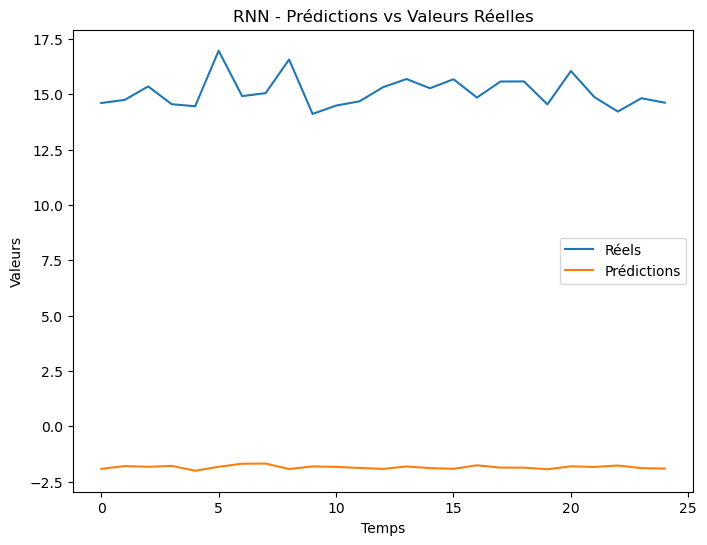

In [1148]:
y_pred_rnn = model.predict(X_test)

# S'assurer que les prédictions sont unidimensionnelles
y_pred_rnn = np.ravel(y_pred_rnn)  # ou y_pred_rnn.flatten()

# Tracer les valeurs réelles vs prédictions
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(len(y_test)), y=y_test, label='Réels')
sns.lineplot(x=range(len(y_pred_rnn)), y=y_pred_rnn, label='Prédictions')
plt.title('RNN - Prédictions vs Valeurs Réelles')
plt.xlabel('Temps')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

# Part 3 : Model Comparison


## 3.1 MSE Comparison

<function matplotlib.pyplot.show(close=None, block=None)>

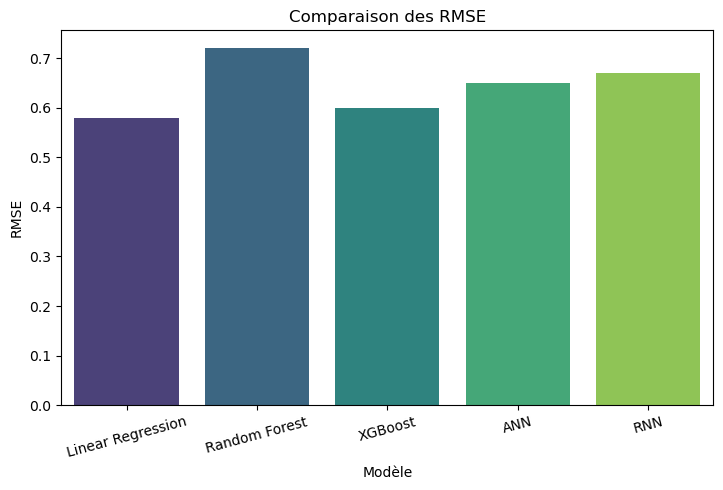

In [1119]:
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'ANN', 'RNN']
rmse_values = [0.58, 0.72, 0.6, 0.65, 0.67]  # Remplacez par vos RMSE
mae_values = [0.47, 0.53, 0.47, 0.49, 0.55]    # Remplacez par vos MAE

# Créer un DataFrame pour les résultats
results_df = pd.DataFrame({
    'Modèle': models,
    'RMSE': rmse_values,
    'MAE': mae_values
})

# Tracer les histogrammes de comparaison
plt.figure(figsize=(14, 5))

# Histogramme RMSE
plt.subplot(1, 2, 1)
sns.barplot(x='Modèle', y='RMSE', data=results_df, palette='viridis')
plt.title('Comparaison des RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=15)


plt.tight_layout()
plt.show

## 3.2 MAE Comparison

<function matplotlib.pyplot.show(close=None, block=None)>

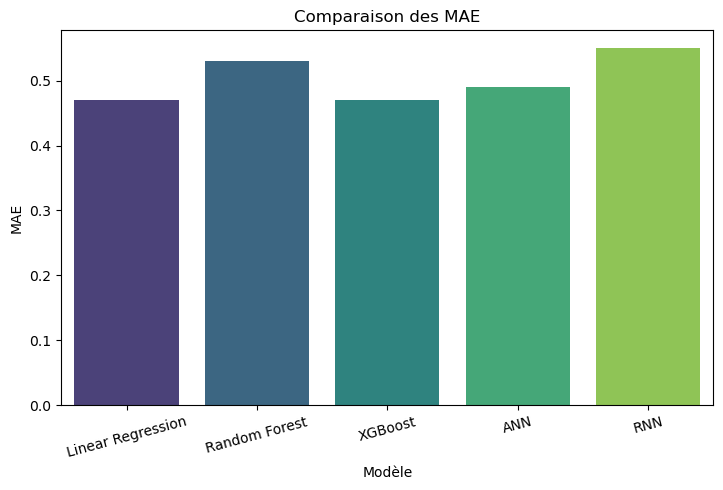

In [1120]:
plt.figure(figsize=(14, 5))
# Histogramme MAE
plt.subplot(1, 2, 2)
sns.barplot(x='Modèle', y='MAE', data=results_df, palette='viridis')
plt.title('Comparaison des MAE')
plt.ylabel('MAE')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show

*Realized by:*
- **Lekehal Hammada**
- **Industrial Engineering Student Specialized in Data Science For Smart Industry**
- **Master's degree in The Next Productin Revolution**
- **Natianal School of Engineers of Tunis**